# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_path = "/data/ephemeral/home/movie/data/train/"
eval_path = "/data/ephemeral/home/movie/data/eval/"
train_ratings = pd.read_csv(os.path.join(train_path, "train_ratings.csv"))
directors = pd.read_csv(os.path.join(train_path, "directors.tsv"), sep="\t")
genres = pd.read_csv(os.path.join(train_path, "genres.tsv"), sep="\t")
titles = pd.read_csv(os.path.join(train_path, "titles.tsv"), sep="\t")
writers = pd.read_csv(os.path.join(train_path, "writers.tsv"), sep="\t")
years = pd.read_csv(os.path.join(train_path, "years.tsv"), sep="\t")
sample_submission = pd.read_csv(os.path.join(eval_path, "sample_submission.csv"))

# EDA

## train_ratings

### 기본

In [5]:
pd.set_option("display.float_format", "{:.2f}".format)

In [6]:
train_ratings.describe()

,user,item,time
count,5154471.00,5154471.00,5154471.00
mean,68751.53,17168.49,1248016668.34
std,39934.60,26335.63,89683016.23
min,11.00,1.00,1113220585.00
25%,34199.00,1304.00,1170354773.00
50%,68605.00,3897.00,1234651154.00
75%,103201.00,26712.00,1318284098.50
max,138493.00,119145.00,1427781052.00


In [26]:
train_ratings.nunique()

user      31360
item       6807
time    5074973
dtype: int64

<Axes: xlabel='time', ylabel='Count'>

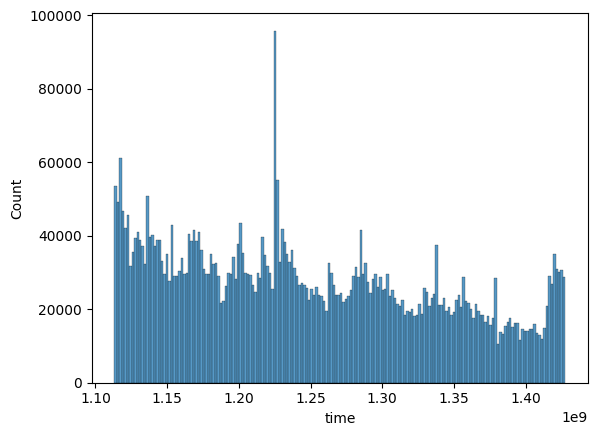

In [23]:
sns.histplot(train_ratings["time"])

### Long Tail EDA

In [ ]:
train_ratings.sort_values(by=["user", "time"], inplace=False)

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


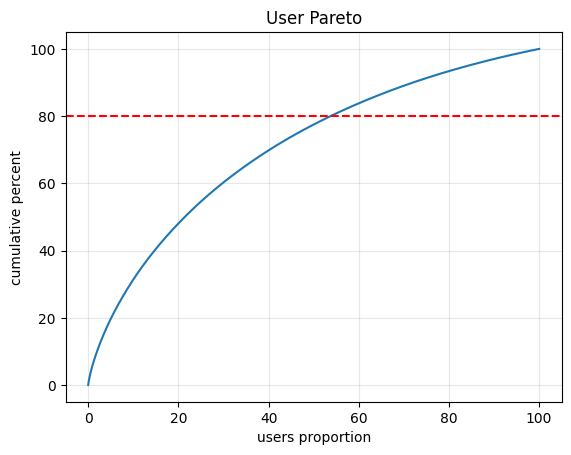

In [52]:
# 유저 파레토 차트

ratings_group = train_ratings["user"].value_counts()
sorted_ratings = ratings_group.sort_values(ascending=False)
per_df = 100 * sorted_ratings.cumsum() / sorted_ratings.sum()
plt.plot(100 * np.arange(sorted_ratings.shape[0]) / sorted_ratings.shape[0], per_df)
plt.axhline(y=80, color="red", linestyle="--")
plt.xlabel("users proportion")
plt.ylabel("cumulative percent")
plt.title("User Pareto")
plt.grid(alpha=0.3)

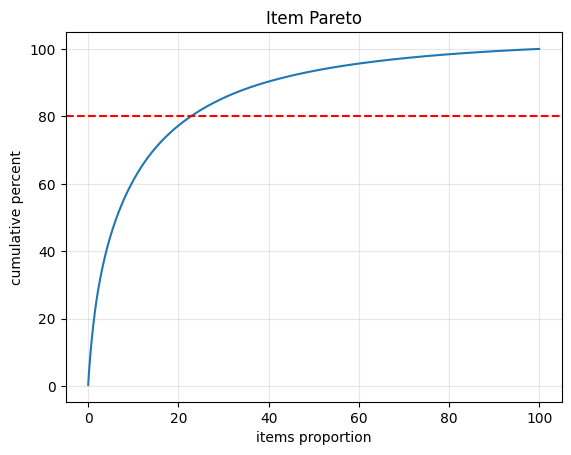

In [54]:
# 아이템 파레토 차트

ratings_group = train_ratings["item"].value_counts()
sorted_ratings = ratings_group.sort_values(ascending=False)
per_df = 100 * sorted_ratings.cumsum() / sorted_ratings.sum()
plt.plot(100 * np.arange(sorted_ratings.shape[0]) / sorted_ratings.shape[0], per_df)
plt.axhline(y=80, color="red", linestyle="--")
plt.xlabel("items proportion")
plt.ylabel("cumulative percent")
plt.title("Item Pareto")
plt.grid(alpha=0.3)

아이템의 경우에는 롱테일 특성이 나타남!

## genres

In [12]:
genres.nunique()

item     6807
genre      18
dtype: int64

-> 모든 영화 존재!

In [7]:
genres.shape

(15933, 2)

In [14]:
genres["genre"].value_counts()

genre
Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: count, dtype: int64

## directors

In [10]:
directors.nunique()

item        5503
director    1340
dtype: int64

문자열이니까 "None"으로 채우면 되지않을까?

In [45]:
print(directors["item"].value_counts().sort_values(ascending=False))
print(directors["director"].value_counts().sort_values(ascending=False))

item
50912    14
1282     10
27002     8
7502      7
596       7
         ..
9004      1
26750     1
761       1
4203      1
6992      1
Name: count, Length: 5503, dtype: int64
director
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0000200     2
nm1102140     2
nm1119645     2
nm1125131     2
nm1134029     2
Name: count, Length: 1340, dtype: int64


In [51]:
titles.loc[titles["item"] == 50912, "title"]

3020    Paris, I Love You (Paris, je t'aime) (2006)
Name: title, dtype: object

In [8]:
directors.shape

(5905, 2)

## titles

In [19]:
titles.nunique()

item     6807
title    6806
dtype: int64

In [20]:
titles.shape

(6807, 2)

In [40]:
titles

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


- titles는 영문 제목 (a.k.a. 일부 국가 제목) (원어 제목) (연도) 로 이루어져 있으며, 가운데 두 개는 생략된 것들도 있다. 원어 제목이 있는 경우 원어로 적을지, 아니면 영문명으로 할지 선택해야 할 듯

- "~, The" 처럼 적힌 것들은 "The ~"와 같이 바꾸는 것이 좋을랑가?

## writers

In [41]:
writers.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [16]:
writers.nunique()

item      5648
writer    2989
dtype: int64

In [ ]:
writers.shape

(11306, 2)

In [43]:
print(writers["writer"].value_counts())
print(writers["item"].value_counts())

writer
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm2648685     2
nm2744748     2
nm2774833     2
nm0494435     2
nm0489995     2
Name: count, Length: 2989, dtype: int64
item
1907     24
783      23
364      21
2687     21
6889     19
         ..
7941      1
7937      1
2131      1
34155     1
7936      1
Name: count, Length: 5648, dtype: int64


## years

In [55]:
print(years.nunique())
print(years.shape)

item    6799
year      93
dtype: int64
(6799, 2)


In [65]:
items = pd.DataFrame(data={"item": train_ratings["item"].unique()})
items = pd.merge(items, years, how="outer", on="item")
year_na = items[items["year"].isna()]
year_na

,item,year
1847,3310,NaN
3455,6987,NaN
3456,6988,NaN
3513,7065,NaN
3605,7243,NaN
3948,8511,NaN
4595,32898,NaN
6806,119145,NaN


In [67]:
pd.set_option('display.max_colwidth', None)
titles.loc[titles["item"].isin(year_na["item"]), "title"]

984     Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)
1284                                                         Kid, The (1921)
2359                                           Birth of a Nation, The (1915)
2620                 Intolerance: Love's Struggle Throughout the Ages (1916)
2669                                                   Immigrant, The (1917)
2676                   Broken Blossoms or The Yellow Man and the Girl (1919)
3177                    Trip to the Moon, A (Voyage dans la lune, Le) (1902)
6043                                     Kingsman: The Secret Service (2015)
Name: title, dtype: object

years의 결측치는 titles에서 가져와서 채우면 될 듯

<Axes: xlabel='year', ylabel='Count'>

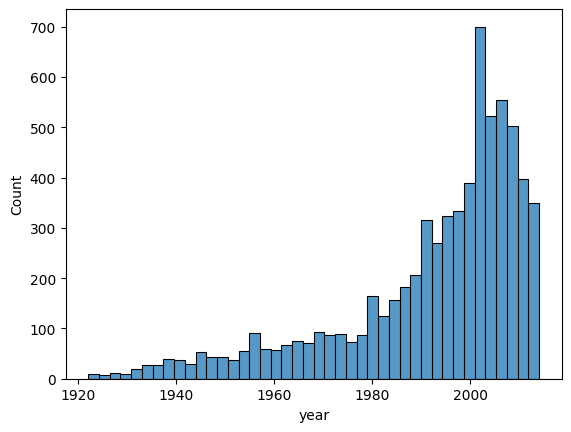

In [ ]:
sns.histplot(years["year"])